In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
def non_max_suppression(gradient_magnitude, gradient_direction):
    suppressed_gradient = np.zeros_like(gradient_magnitude)
    
    gradient_direction = (gradient_direction * 180 / np.pi) % 180

    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            q = 255
            r = 255
            
            if (0 <= gradient_direction[i, j] < 22.5) or (157.5 <= gradient_direction[i, j] <= 180):
                q = gradient_magnitude[i, j + 1]
                r = gradient_magnitude[i, j - 1]
            elif 22.5 <= gradient_direction[i, j] < 67.5:
                q = gradient_magnitude[i + 1, j - 1]
                r = gradient_magnitude[i - 1, j + 1]
            elif 67.5 <= gradient_direction[i, j] < 112.5:
                q = gradient_magnitude[i + 1, j]
                r = gradient_magnitude[i - 1, j]
            elif 112.5 <= gradient_direction[i, j] < 157.5:
                q = gradient_magnitude[i - 1, j - 1]
                r = gradient_magnitude[i + 1, j + 1]

            if (gradient_magnitude[i, j] >= q) and (gradient_magnitude[i, j] >= r):
                suppressed_gradient[i, j] = gradient_magnitude[i, j]
            else:
                suppressed_gradient[i, j] = 0

    return suppressed_gradient

In [3]:
def double_threshold(gradient_image, low_threshold, high_threshold):
    edge_image = np.zeros_like(gradient_image)

    strong_edges = (gradient_image >= high_threshold)
    weak_edges = (gradient_image >= low_threshold) & (gradient_image < high_threshold)
    
    strong_edge_rows, strong_edge_cols = np.nonzero(strong_edges)
    edge_image[strong_edge_rows, strong_edge_cols] = 255

    weak_edge_rows, weak_edge_cols = np.nonzero(weak_edges)
    for i in range(len(weak_edge_rows)):
        row = weak_edge_rows[i]
        col = weak_edge_cols[i]
        neighborhood = gradient_image[row-1:row+2, col-1:col+2]
        if np.max(neighborhood) >= high_threshold:
            edge_image[row, col] = 255

    return edge_image

In [4]:
def canny_edge_detection(image, low_threshold, high_threshold):
    if len(image.shape) == 3:
        image = np.mean(image, axis=-1)
    blurred_image = ndimage.gaussian_filter(image, sigma=1)
    gradient_x = ndimage.sobel(blurred_image, axis=1)
    gradient_y = ndimage.sobel(blurred_image, axis=0)
    gradient_magnitude = np.hypot(gradient_x, gradient_y)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    suppressed_gradient = non_max_suppression(gradient_magnitude, gradient_direction)

    edge_image = double_threshold(suppressed_gradient, low_threshold, high_threshold)

    return edge_image

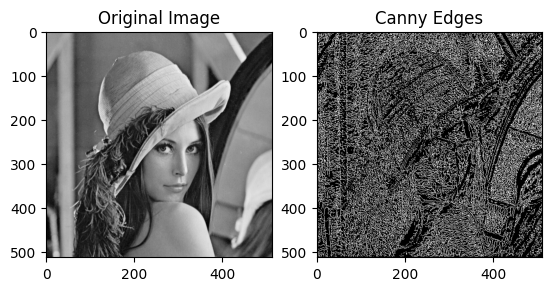

In [5]:
img = cv.imread('CoverImages/lena.tiff',0)
edges_result = canny_edge_detection(img, 30, 100)

# Display the original image and the edges
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(edges_result, cmap='gray')
plt.title('Canny Edges')

plt.show()


[[  0   0 255 ... 184 152 204]
 [  0   0 253 ... 184 152 204]
 [  0   0 252 ... 183 152 204]
 ...
 [  4  14  15 ...   8   0 255]
 [  8  20  19 ...  11   7   1]
 [ 11  23  20 ...  12  11   3]]
[[  0   0 255 ... 252 252 252]
 [  0   0 255 ... 252 252 252]
 [  0   0   0 ... 245 244 244]
 ...
 [242 248 255 ...  20  26  31]
 [254   2   5 ...  11  15  19]
 [  1   3   4 ...   4   5   7]]


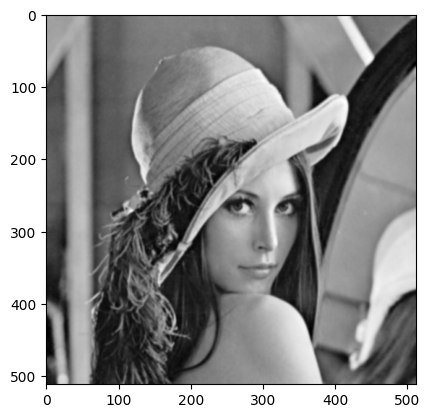

In [10]:
blurred_image = ndimage.gaussian_filter(img, sigma=1)
gradient_x = ndimage.sobel(blurred_image, axis=1)
gradient_y = ndimage.sobel(blurred_image, axis=0)
print(gradient_x)
print(gradient_y)
plt.imshow(blurred_image, cmap='gray')
plt.show()

In [11]:
Sobel_kernel = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

In [12]:
def convolution(image, kernel):
    image_height, image_width = len(image), len(image[0])
    kernel_height, kernel_width = len(kernel), len(kernel[0])
    
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2

    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant', constant_values=0)

    result = np.zeros_like(image)

    for i in range(image_height):
        for j in range(image_width):
            pixel_sum = 0
            for m in range(kernel_height):
                for n in range(kernel_width):
                    pixel_sum += padded_image[i + m][j + n] * kernel[m][ n]
            result[i][j] = pixel_sum

    return result

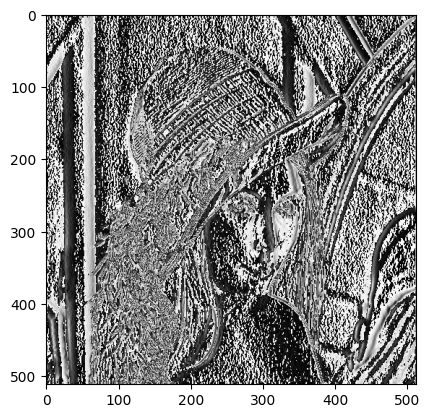

In [14]:
blu = convolution(img,Sobel_kernel)
plt.imshow(blu, cmap='gray')
plt.show()